(70, 8)


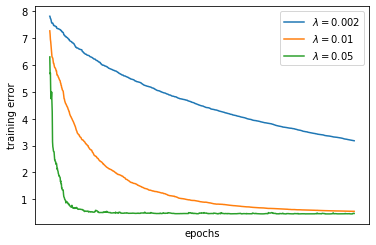

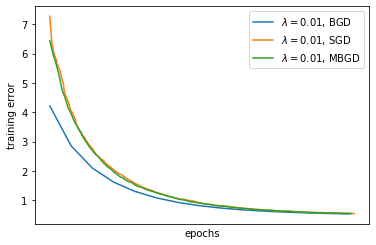

In [40]:
from sklearn import linear_model
from sklearn import utils
from sklearn import metrics

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

def stochastic_gradient(X_train,y_train,lr):
    i=0
    n=0
    clf = linear_model.SGDRegressor(max_iter = 1000, tol=1e-8,verbose=0,alpha=0,eta0=lr)

    errors = []
    ns = []

    while(1):
        clf.partial_fit([X_train[i,:]],[y_train[i]])
        y_eval = clf.predict(X_train)
    #    print(y_eval.shape)
        error =metrics.mean_squared_error(y_eval,y_train)
        errors.append(error)
        ns.append(n)
    #    error =(y_eval-y_train[i])**2
    #    print(i,error)
        i=i+1
        n=n+1
        if (i>=N_train):
            X_train, y_train = utils.shuffle(X_train, y_train)
            i=0
        if n>=1000:
            break

    return errors, ns
            
def minibatch_gradient(X_train,y_train,lr):
        
    i=0
    n=0
    clf = linear_model.SGDRegressor(max_iter = 1000, tol=1e-8,verbose=0,alpha=0,eta0=lr)

    errors = []
    ns =[]

    X_train_sub = np.array_split(X_train,7)
    y_train_sub = np.array_split(y_train,7)
    
    
    while(1):
        clf.partial_fit(X_train_sub[i],y_train_sub[i])
        y_eval = clf.predict(X_train)
    #    print(y_eval.shape)
        error =metrics.mean_squared_error(y_eval,y_train)
        errors.append(error)
        ns.append(n)
    #    error =(y_eval-y_train[i])**2
    #    print(i,error)
        i=i+1
        n=n+10
        if (i>=len(X_train_sub)):
            X_train, y_train = utils.shuffle(X_train, y_train)
            X_train_sub = np.array_split(X_train,7)
            y_train_sub = np.array_split(y_train,7)
            i=0
        if n>=1000:
            break

    return errors, ns

def batch_gradient(X_train,y_train,lr):
        
    i=0
    n=0
    clf = linear_model.SGDRegressor(max_iter = 1000, tol=1e-8,verbose=0,alpha=0,eta0=lr)

    errors = []
    ns =[]

    while(1):
        clf.partial_fit(X_train,y_train)
        y_eval = clf.predict(X_train)
    #    print(y_eval.shape)
        error =metrics.mean_squared_error(y_eval,y_train)
        errors.append(error)
        ns.append(n)
    #    error =(y_eval-y_train[i])**2
    #    print(i,error)
        i=i+1
        n=n+70
        X_train, y_train = utils.shuffle(X_train, y_train)
        i=0
        if n>=1000:
            break

    return errors, ns


N = 97

X=np.loadtxt("prostate.csv", skiprows=1, usecols=(1,2,3,4,5,6,7,8))
y=np.loadtxt("prostate.csv", skiprows=1, usecols=(9))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.27, random_state=0)

print(X_train.shape)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
N_train = X_train.shape[0]

plt.figure()

errors, ns = stochastic_gradient(X_train, y_train,0.002)
plt.plot(ns,errors, label="$\lambda=0.002$")

errors, ns = stochastic_gradient(X_train, y_train,0.01)
plt.plot(ns,errors, label="$\lambda=0.01$")

errors, ns = stochastic_gradient(X_train, y_train,0.05)
plt.plot(ns,errors, label="$\lambda=0.05$")

plt.xlabel("epochs")
plt.ylabel("training error")
plt.xticks(ticks=[])

plt.legend()
plt.show()



plt.figure()

errors, ns = batch_gradient(X_train, y_train,0.01)
plt.plot(ns,errors, label="$\lambda=0.01$, BGD")

errors, ns = stochastic_gradient(X_train, y_train,0.01)
plt.plot(ns,errors, label="$\lambda=0.01$, SGD")

errors, ns = minibatch_gradient(X_train, y_train,0.01)
plt.plot(ns,errors, label="$\lambda=0.01$, MBGD")

plt.xlabel("epochs")
plt.ylabel("training error")
plt.xticks(ticks=[])

plt.legend()
plt.show()


